## 📊 Sales Analysis - Northwind
This notebook analyzes the best-selling products in the **Northwind** database using **SQL and Python**.
I will extract data and visualize it with charts 📈

In [1]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Establish connection with DataBase (DB)
db_path = "Northwind.db"
conn = sqlite3.connect(db_path)

# Verify connection
query0 = ''' 
    SELECT *
    FROM OrderDetails as od
    LIMIT 10;
'''

# Execute query and read result
test_table = pd.read_sql_query(query0, conn)

# Show test
print(test_table)

# Close connection to free up DB resources
conn.close()

   OrderDetailID  OrderID  ProductID  Quantity
0              1    10248         11        12
1              2    10248         42        10
2              3    10248         72         5
3              4    10249         14         9
4              5    10249         51        40
5              6    10250         41        10
6              7    10250         51        35
7              8    10250         65        15
8              9    10251         22         6
9             10    10251         57        15


## Visualize the ER model:
The Entity-Relationship (ER) model is a conceptual model used in database design to represent the relationships between entities and attributes within a system. Entities represent concepts to be modeled (Ex: "Customer" or "Product"), and attributes are the characteristics or properties of entities (Ex: "Name" or "Price").

![entity relationship model](Northwind_E-R_Diagram.png)

## Analyze the DB 
1. Sales analysis by product
2. Product analysis by category 
3. Sales analysis by region or country 
4. Most valuable customer analysis 
5. Sales analysis over time 
6. Order frequency analysis
7. Analysis of products without sales 

### 1.Sales analysis by product

In [5]:
## 1.Sales analysis by product 
## The objective is to identify which are the best-selling and least-selling products 

# Establish connection with DB
db_path = "Northwind.db"
conn = sqlite3.connect(db_path)

# Query for the top 10 best-selling products
query_top = ''' 
    SELECT ProductName, SUM(od.Quantity) AS TotalSold
    FROM OrderDetails AS od
    JOIN Products AS p ON p.ProductID = od.ProductID
    GROUP BY p.ProductName
    ORDER BY TotalSold DESC
    LIMIT 10;
'''

# Query for the bottom 10 least-selling products
query_bottom = ''' 
    SELECT ProductName, SUM(od.Quantity) AS TotalSold
    FROM OrderDetails AS od
    JOIN Products AS p ON p.ProductID = od.ProductID
    GROUP BY p.ProductName
    ORDER BY TotalSold ASC
    LIMIT 10;
'''

# Execute the queries and read results into DataFrames
top_sales = pd.read_sql_query(query_top, conn)
low_sales = pd.read_sql_query(query_bottom, conn)

# Show the results
print("Top 10 Best-Selling Products:")
print(top_sales)

print("\nBottom 10 Least-Selling Products:")
print(low_sales)

# Close connection to free up DB resources
conn.close()


Top 10 Best-Selling Products:
            ProductName  TotalSold
0     Gorgonzola Telino        458
1     Camembert Pierrot        430
2        Steeleye Stout        369
3  Raclette Courdavault        346
4                 Chang        341
5               Pavlova        338
6           Fløtemysost        336
7          Alice Mutton        331
8        Tarte au sucre        325
9               Geitost        316

Bottom 10 Least-Selling Products:
                       ProductName  TotalSold
0        Laughing Lumberjack Lager          5
1                      Røgede sild         15
2              Gustaf's Knäckebröd         18
3                  Mishi Kobe Niku         20
4                     Genen Shouyu         25
5  Uncle Bob's Organic Dried Pears         25
6        Queso Manchego La Pastora         27
7     Grandma's Boysenberry Spread         36
8                       Gravad lax         39
9                       Röd Kaviar         45


Top 10 Most Profitable Products:
               ProductName   Revenue
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


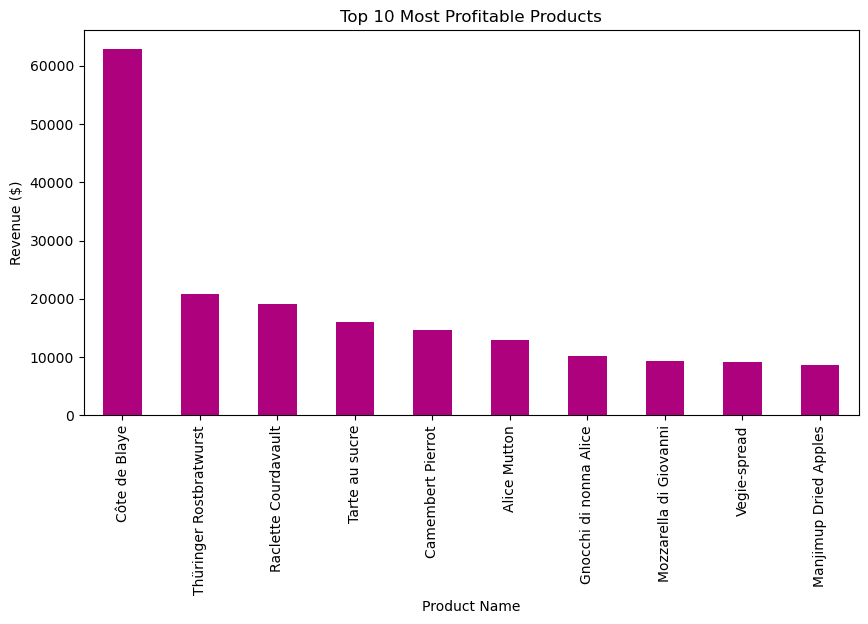

In [6]:
## 1.Sales analysis by product
## The objective is to identify which products are the most profitable

# Establish connection with DB
db_path = "Northwind.db"
conn = sqlite3.connect(db_path)

## Query of the 10 most profitable products

query = ''' 
    SELECT ProductName, SUM(p.Price * od.Quantity) AS Revenue
    FROM OrderDetails AS od
    JOIN Products AS p ON p.ProductID = od.ProductID
    GROUP BY p.ProductName
    ORDER BY Revenue DESC
    LIMIT 10;
'''

# Execute the queries and read results into DataFrames
profit_products = pd.read_sql_query(query, conn)

# Show results in the console
print("Top 10 Most Profitable Products:")
print(profit_products)

# Use of hexadecimal color 
hex_colors = ['#ae017e']

# Make a graphic of the table
bar = profit_products.plot(
    x="ProductName",
    kind="bar",
    figsize=(10,5),
    legend=False,
    color = hex_colors)

# Add the title and labels
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Close connection to free up DB resources
conn.close()